# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [84]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

[]

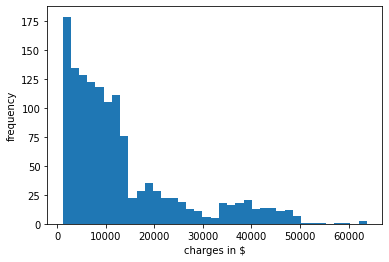

In [44]:
bins = int(round(np.sqrt(len(medical.charges))))
_ = plt.hist(medical.charges, bins=bins)
_ = plt.xlabel('charges in $')
_ = plt.ylabel('frequency')
plt.plot()

In [129]:
mean = round(np.mean(medical.charges),2)
std = round(np.std(medical.charges, ddof=1),2)
median = round(np.median(medical.charges),2)
print(f'Sample Statistics\nMean: {mean}\nStandard Deviation: {std}\nMedian: {median}')

Sample Statistics
Mean: 13270.42
Standard Deviation: 12110.01
Median: 9382.03


<b>The data has a large spread and is not normally distributed. Skewed right (long tail on the right and mean is greater than median).</b>

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ <b>We are able to assume the data is representative of the population we are trying to predict. We can calculate the 95% confidence interval of the mean using the t-statistic to determine if it includes $12,000. If so, the administrator's concern is justified.</b>

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ <b>The administrator is only concerned about the population mean being less than the sample mean, therefore a one-sided interval test is appropriate.</b>
- Null Hypothesis: The population mean can be represented by the sample mean
- Alternate Hypothesis: The population mean is significantly less than the sample mean

In [143]:
df = len(medical.charges)-1
t_c = t.ppf(0.975, df=df)
print(f't critical value: {t_c}')

# Would I use .05 to just get one side? print(t.ppf(0.05, df=df))

t critical value: 1.961739888600845


In [144]:
margin_error_t = t_c * (std/np.sqrt(len(medical.charges)))
print(f'Left Tail 95% Confidence Interval: {round(mean - margin_error_t, 2)} to {round(mean + margin_error_t, 2)}')

Left Tail 95% Confidence Interval: 12620.95 to 13919.89


In [145]:
# If it were 12,000 then
test_stat_12 =(mean-12000)/(std/np.sqrt(50-1))
print(test_stat_12)
# Our test statistic, 0.73, is NOT greater than our critical value of 1.96,
# therefore we do not reject the null hypothesis.

0.734346214412705


In [146]:
# We are 95% confident that the population mean is between $12,620.95 and $13,919.89.
# This is not less than the worrisome mean of $12,000 or less.
# Therefore, the administrator does not need to be concerned.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
- <b>Null Hypothesis:</b> There is no significant difference of mean charges between those with insurance and those without.
- <b>Alternate Hypothesis:</b> There is a significant difference of mean charges between those with insurance and those without.
- <b>Variance:</b> Assuming it is equal for both groups to comply with null hypothesis.


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [147]:
# Create dataframe for each group
claim = medical.charges[medical.insuranceclaim == 1]
noclaim = medical.charges[medical.insuranceclaim == 0]

# Calculate the mean of charges per group
claim_mean = np.mean(claim)
noclaim_mean = np.mean(noclaim)

# Calculate the std of charges per group
claim_std = np.std(claim, ddof=1)
noclaim_std = np.std(noclaim, ddof=1)

# Calculate the length of each group
claim_len = len(claim)
noclaim_len = len(noclaim)

print(f'Insured mean: {claim_mean}\nInsured std: {claim_std}\nLength: {claim_len}')
print(f'\nNot insured mean: {noclaim_mean}\nNot insured std: {noclaim_std}\nLength: {noclaim_len}')


Insured mean: 16423.928276537677
Insured std: 14045.928418802134
Length: 783

Not insured mean: 8821.421892306305
Not insured std: 6446.510126811738
Length: 555


In [150]:
# Determine if std are similar (should be between 0.5 and 2, but it is not...)
claim_std/noclaim_std

2.178842217339206

In [151]:
# MANUAL CALCULATION
# Calculate pooled standard deviation
pool_std = np.sqrt(
                    (((claim_len-1)*claim_std**2)+((noclaim_len-1)*noclaim_std**2))/
                    (claim_len+noclaim_len-2)
                  )
print(f'Pooled std: {pool_std}')

# Calculate t-test statistic
t_test = (
            (claim_mean - noclaim_mean)/
            (pool_std*np.sqrt((1/claim_len)+(1/noclaim_len)))
         )
print(f't-test statistic: {t_test}')

# Calculate degrees of freedom and p-value
total_df = claim_len + noclaim_len - 2
p_val = t.sf(t_test, df=total_df)*2
print(f'p-value: {p_val}')

Pooled std: 11520.034268775262
t-test statistic: 11.89329903087671
p-value: 4.461230231620972e-31


In [155]:
crit_val = t.ppf(0.975, df=total_df)
print(f'Critical value: {crit_val}')

Critical value: 1.9617412190546957


In [ ]:
# Since the t-test statistic of 11.89 is greater than the critical value of 1.69????

# The p-value is less than 0.05 (our critical value) and less than 0.01,
# therefore we can reject the null hypothesis.
# There is enough evidence to suggest the alternative.

In [159]:
# USING STATS FUNCTION
from scipy import stats
stats.ttest_ind(claim, noclaim, equal_var=True, nan_policy='omit')

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ <b>There is no equivalent z-test from a sample in scipy.stats. This could be because a z-test requires that the population variance be known and that both samples be normally distributed (or sample sizes larger than 30 and CLT applies).</b>

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test